Titanic - a simple solution with a score of 0.818 on Kaggle

At Kaggle.com, the Titanic problem is the simplest of all but it carries sufficient challenges that one can learn a lot from it. In this exercise I will show you a simple, yet good, solution.

Objective: in the Titanic challenge our objective is to build a predictive model that will accurately predict who could have survived and who couldn't.

Prerequisites: you need to know some Python or at least some experience with any programming language. If you have dealt with data analysis in the past and also know some statistics that will help, but it is not mandatory.

Process: all machine learning problems are solved using the following basic steps:
1) Understand data (known as exploratory data analysis)
2) Prepare data (imputation of missing values, data transformation)
3) Feature engineering & selection (create new features, drop unnecessary features)
4) Model development
5) Making predictions

1) Understand data

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

DATADIR = "data\\"
df = pd.read_csv(DATADIR+"train.csv")

# Find numbers of rows and columns in the dataset
df.shape

(891, 12)

There are 891 rows and 12 columns in this dataset

In [2]:
# Review the top five rows
df.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# The describe() function of pandas lets us review some basic statistics on numerical features in the data
df.describe()

C:\Users\CMTC\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,223.500000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,446.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,668.500000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The "count" row shows that Age column has 177 missing values. (891-714) = 177

Univariate analysis:
Univariate analysis is a data exploratory technique where we look at each variable by itself. We will use the histogram function in pandas.

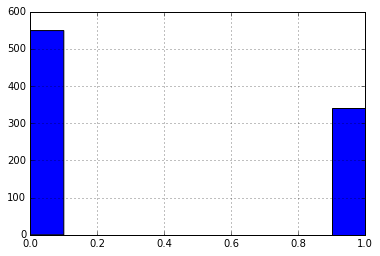

In [4]:
df["Survived"].hist()

The plot above shows that more people have died than survived. Survived=0 is longer than Survived=1

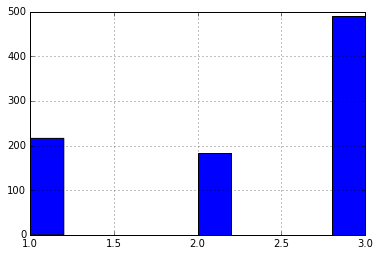

In [5]:
df["Pclass"].hist()

Many people have traveled 3rd class, although there are a decent number of passengers in classes 1 and 2 as well.

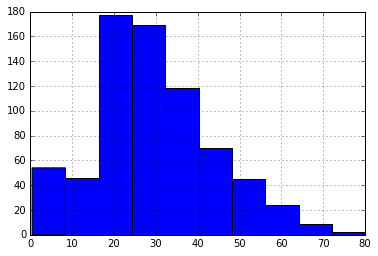

In [6]:
df["Age"].hist()

There is a wide variation in "Age", ranging from almost 0 to 80 years

In [7]:
df["Age"].min(), df["Age"].max(), df["Age"].mean()

(0.41999999999999998, 80.0, 29.69911764705882)

Minimum passenger age was 0.42, maximum age was 80, and average age all passengers was 29.7

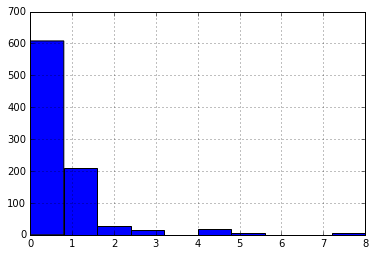

In [8]:
df["SibSp"].hist()

SibSp, the number of siblings and spouses traveling with the passenger ranges from 0 to 8.

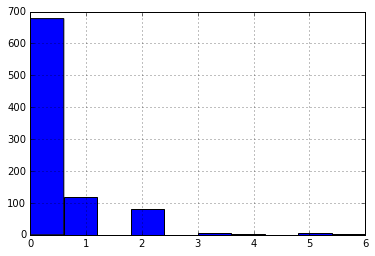

In [9]:
df["Parch"].hist()

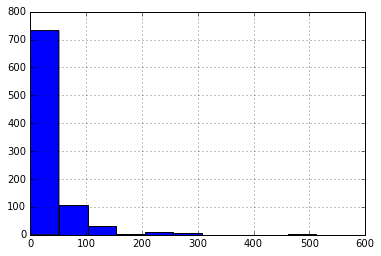

In [10]:
df["Fare"].hist()

In [11]:
df["Fare"].quantile([0.0, 0.25, 0.5, 0.75, 1.0])

0.00      0.0000
0.25      7.9104
0.50     14.4542
0.75     31.0000
1.00    512.3292
Name: Fare, dtype: float64

Fare is mostly below 31, although the highest is at 512.3

While histograms are great for seeing distribution of numerical variables, we can't draw a histogram on categorical variables.
Pandas has value_counts() function for looking at categorical distribution.

In [12]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

There are about twice as many males as females on the ship.

In [13]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Many passengers embarked at "S"

Bivariate analysis:
Our next analysis involved bivariate analysis where we look at the effect of each feature on the target (Survived column).
Pandas has a nice function called groupby (similar to group by in SQL) and we will use it for bivariate analysis.

In [14]:
df.groupby(["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

The survival chances for females were 3 to 4 times higher than males on Titanic

In [15]:
df.groupby(["Embarked"])["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [16]:
df.groupby(["Pclass"])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [17]:
df.groupby(["SibSp"])["Survived"].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [18]:
df.groupby(["Parch"])["Survived"].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [19]:
df.groupby(["Sex", "Pclass"])["Survived"].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

Running groupby on a feature such as Age or Fare doesn't work as there are too many distinct values for Age and Fare. For such features, we can draw two histograms (one for Survived=0 and another for Survived=1) as shown below.

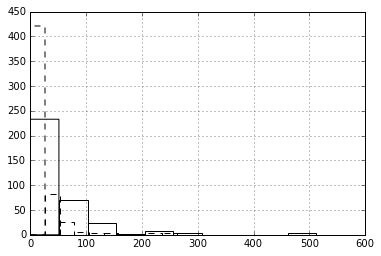

In [20]:
df[df["Survived"]==1]["Fare"].hist(facecolor="None")
df[df["Survived"]==0]["Fare"].hist(facecolor="None", ls='dashed')

Passengers at higher fares seemed to have survived better

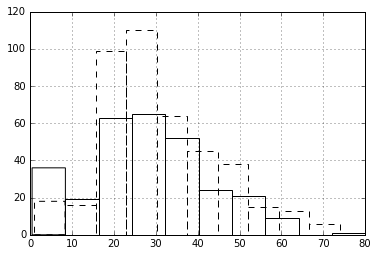

In [21]:
df[df["Survived"]==1]["Age"].hist(facecolor="None")
df[df["Survived"]==0]["Age"].hist(facecolor="None", ls='dashed')

Children below 10 years of age seemed to have survived better, but other than that "age" didn't seem to have much of an effect.
As a part of bivariate analysis, we will look at correlations. Pearson correlation looks at linear relationship between variables, while Spearman correlation looks at monotonic relationship.

In [22]:
abs(df.corr(method='pearson')["Survived"]).sort_values(ascending=False)

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

In [23]:

abs(df.corr(method='spearman')["Survived"]).sort_values(ascending=False)

Survived       1.000000
Pclass         0.339668
Fare           0.323736
Parch          0.138266
SibSp          0.088879
Age            0.052565
PassengerId    0.005007
Name: Survived, dtype: float64

In [24]:
df.isnull().sum()

Survived         0
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age has 177 missing values, Cabin has many missing values, and embarked has 2 missing values.

It is best to fill numerical missing values with median, and categorical values with mode (most commonly occuring value).

In [25]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna("S") # most of the passengers embarked at S
df.isnull().sum()

Survived         0
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Next we need to convert categorical values to numerical values as machine learning do not like non-numerical values.

In [26]:
df["Sex"] = df["Sex"].map({"male":0, "female":1})
df["Embarked"] = df["Embarked"].map({"C":0, "S":1, "Q":2})

In [27]:
df.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,1,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,0,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1


The data table above shows that features "Sex" and "Embarked" are converted from categorical to numeric values. Name, Ticket, Cabin are still categorical but we will deal with them a bit later.

3) Feature engineering and feature selection:
In this step we will create some new features. Normally as a data scientist you would come up with various hypothesis. You generate these hypothesis either through your own thought process or through your discussions with a domain expert.

In our case, I suspect that family size might play a role in the survival as each family member could try helping others to get on a raft.

In [28]:
df["Family"] = df["Parch"] + df["SibSp"]
df["IsSingle"] = df["Family"]==0
df.groupby(["IsSingle"])["Survived"].mean()

IsSingle
False    0.505650
True     0.303538
Name: Survived, dtype: float64

In [29]:
df["IsSingle"] = df["IsSingle"].map({False:0, True:1})

Someone that is single seem to carry lower survival change than one that is not.

Next we do feature selection.

Passengerid may not carry any predicted power as it is simply an id. We will also not worry about "Name", "Cabin", and "Ticket" as those are text variables and need deeper analysis. We don't want them in the simple solution we plan on building. Before finalizing the features we want to include in our model, let us also review the test dataset.

In [30]:
test_df = pd.read_csv(DATADIR+"test.csv")
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age and Cabin have a lot of missing values and Fare has one value missing in the test dataset.
Earlier, we didn't see Age having much of a correlation with the Survived column. So we will skip "Age" as well.
Our final set of selected features are shown below.

In [31]:
predictors = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked", "IsSingle"]
df[predictors].head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,IsSingle
0,3,0,1,0,7.2500,1,0
1,1,1,1,0,71.2833,0,0
2,3,1,0,0,7.9250,1,1
3,1,1,1,0,53.1000,1,0
4,3,0,0,0,8.0500,1,1


4) Model development
We will store predictor values in X and target in y.

In [32]:
X = df[predictors].values
y = df["Survived"].values


Let us split X and y into train and test datasets.

In [33]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\Users\CMTC\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


When the training dataset is small, as is the case here, how we split the data to train and test datasets could affect the result. That part is usually handled using a five hold cross-validation. We will skip that part in this simple solution as I didn't find that to make much of a difference for what we plan on learning from this dataset.

In [34]:
from sklearn.metrics import accuracy_score  
from sklearn.ensemble import RandomForestClassifier    
alg = RandomForestClassifier(n_estimators=100)    
alg.fit(X_train, y_train)
ypred = alg.predict(X_test)

print "Model accuracy for Random Forest =", accuracy_score(y_test, ypred)

from sklearn.ensemble import GradientBoostingClassifier    
alg = GradientBoostingClassifier(n_estimators=100)    
alg.fit(X_train, y_train)
ypred = alg.predict(X_test)
  
print "Model accuracy for Gradient Boosting Model =", accuracy_score(y_test, ypred)  

Model accuracy for Random Forest = 0.826815642458
Model accuracy for Gradient Boosting Model = 0.826815642458


Tree based models like Random Forest and Graident Boosting calculate feature importance

In [35]:
features = pd.DataFrame()
features['feature'] = predictors
features['importance'] = alg.feature_importances_
features.sort_values(by=['importance'], ascending=False, inplace=True)
print features

    feature  importance
4      Fare    0.607181
1       Sex    0.143133
3     Parch    0.108340
5  Embarked    0.049422
0    Pclass    0.046962
2     SibSp    0.043904
6  IsSingle    0.001058


Fare, Sex, Parch seem to be the most important features. Let us now use this model to make predictions on test data from Kaggle, which is different from our train/test split.

In [36]:
test_df = pd.read_csv(DATADIR+"test.csv")
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In the test dataset Fare has 1 missing value that we need to fix that. No need to worry about missing values in "Age", "Cabin" as we didn't include those features in our model above.

In [37]:
test_df["Fare"] = test_df["Fare"].fillna(14.45)
test_df["Sex"] = test_df["Sex"].map({"male":0, "female":1})
test_df["Embarked"] = test_df["Embarked"].map({"C":0, "S":1, "Q":2})
test_df["Family"] = test_df["Parch"] + test_df["SibSp"]
test_df["IsSingle"] = test_df["Family"]==0
test_df["IsSingle"] = test_df["IsSingle"].map({False:0, True:1})
test_df_pred = test_df[predictors]

In [38]:
test_ypred = alg.predict(test_df_pred.values)
out_df = pd.DataFrame({"PassengerId": list(test_df["PassengerId"]), "Survived":test_ypred})
out_df.to_csv(DATADIR+"output-simplemodel.csv", index=False)

This gave me a score of 0.81818 on Kaggle and a rank of 545 out of 10,000 entries on the leaderboard as of today.
<img src="data/kaggle-ranking.png">